<h2 align = "center">Sprawozdanie mofit</h2>
<h4 align="center">Łukasz Puchała, Karol Grzywa</h4>

In [15]:
import numpy as np
from matplotlib.pyplot import inferno
from numba import njit
import math
import matplotlib.pyplot as plt
from math import sin, cos, pi, e, exp
from scipy.linalg import eigh
import Utilis
import plotly.subplots as sp
import plotly.express as px

m = 0.067 # m0
h = 1
at2meV = 27211.6
omega = 10/at2meV
ab = 0.05292
j = 0 + 1j
at2s = 2.42e-5*1e-12

L = 100/ab
N = 2
a = L/(2*N)

In [16]:
grid_N2_L100 = Utilis.ReadFile('Files/wezly_N_2_L_100.dat')


<h2 align = "center">generowanie macierzy lokalnych </h2>

In [17]:
grid_N2_L100 = Utilis.ReadFile('Files/wezly_N_2_L_100.dat')
wezly = np.array(grid_N2_L100)

In [18]:
nlg_N2_l100 = Utilis.ReadFile('Files/nlg_N_2_L_100.dat')
nlg = np.array(nlg_N2_l100)

In [19]:
# funkcja, co bierze poz. wezla naroznego elementu k o loklanym nr i
print( Utilis.xy_nlg(1, 1, nlg, wezly) )
# wspóółrzędne rzeczywiste punktu 
print( 'wsp', Utilis.xryr(k= 1, ksi1= 0, ksi2= 0, nlg= nlg, wezly= wezly) )
j,i,s = Utilis.Sloc(a)
print(s)
print(j)
print(i)

(-50.0, -50.0)
wsp (-37.5, -37.5)
[ 3967.50807674  -991.87701918  -991.87701918   247.9692548
  1983.75403837  -495.93850959  1983.75403837  -495.93850959
   991.87701918  -991.87701918  3967.50807674   247.9692548
  -991.87701918  1983.75403837  1983.75403837  -495.93850959
  -495.93850959   991.87701918  -991.87701918   247.9692548
  3967.50807674  -991.87701918  -495.93850959  -495.93850959
  1983.75403837  1983.75403837   991.87701918   247.9692548
  -991.87701918  -991.87701918  3967.50807674  -495.93850959
  1983.75403837  -495.93850959  1983.75403837   991.87701918
  1983.75403837  1983.75403837  -495.93850959  -495.93850959
 15870.03230694   991.87701918   991.87701918 -3967.50807674
  7935.01615347  -495.93850959  1983.75403837  -495.93850959
  1983.75403837   991.87701918 15870.03230694 -3967.50807674
   991.87701918  7935.01615347  1983.75403837  -495.93850959
  1983.75403837  -495.93850959   991.87701918 -3967.50807674
 15870.03230694   991.87701918  7935.01615347  -495.938

<h2>Wyznaczanie macierzy lokalnych</h2>

In [20]:
Sgiven = Utilis.ReadFile("./Files/S_loc_N2_L100.dat.txt")
Tgiven = Utilis.ReadFile("./Files/T_loc_N2_L100.dat.txt")
V11given = Utilis.ReadFile("./Files/V_loc_N2_L100_element_11.dat.txt")
jt,it,T = Utilis.Tmatrix(m,0.0001)
js,Is,S = Utilis.Sloc(a)
jv,iv,V = Utilis.Vkmatrix(11,a,m,omega,nlg,wezly)
Tdif = T - np.array(Tgiven[2])
Sdiff = S - np.array(Sgiven[2])
Vdiff = V - np.array(V11given[2])


<h2>Rysunek odjętych od siebie macierzy wyznaczonych i danych</h2>

In [21]:
px.imshow(Tdif.reshape((9, 9)), x=np.unique(it), y=np.unique(jt), title='Tdif', color_continuous_scale='Viridis').show()
px.imshow(Sdiff.reshape((9, 9)), x=np.unique(Is), y=np.unique(js), title='Sdiff', color_continuous_scale='Plasma').show()
px.imshow(Vdiff.reshape((9, 9)), x=np.unique(iv), y=np.unique(jv), title='Vdiff', color_continuous_scale='Blues').show()

# Macierze globalne

In [22]:
Sinit, Hinit = Utilis.Gmatrix(N, nlg, wezly, a)
S, H = Utilis.Gboundary(N, Sinit, Hinit, nlg, wezly)

fig_S = px.imshow(S, title="S", color_continuous_scale= 'inferno')
fig_S.show()

fig_H = px.imshow(H, title="H", color_continuous_scale= 'viridis')
fig_H.show()

In [23]:
import pandas as pd
global_matrix_given = pd.read_csv("./Files/MacGlobSiH.dat", sep = r"\s+",header = None)
S_Given = np.array(global_matrix_given[2]).reshape(81,81)
H_Given = np.array(global_matrix_given[3]).reshape(81,81)

fig_S = px.imshow(S_Given-S, title="Sdiff", color_continuous_scale= 'inferno')
fig_S.show()

fig_H = px.imshow(H_Given-H, title="Hdiff", color_continuous_scale= 'viridis')
fig_H.show()


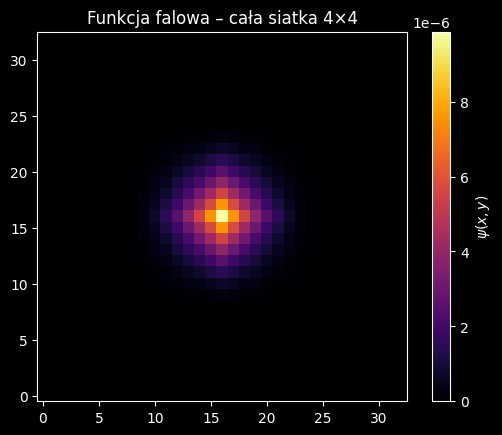

In [24]:
E,C = eigh(H,S)
Cn = C[32]
Psi = Utilis.psi_from_coeffs(C[:,32],N,nlg,wezly)

plt.imshow(np.abs(Psi)**2, origin="lower",cmap = "inferno")
plt.colorbar(label=r"$\psi(x,y)$")
plt.title("Funkcja falowa – cała siatka 4×4")
plt.show()

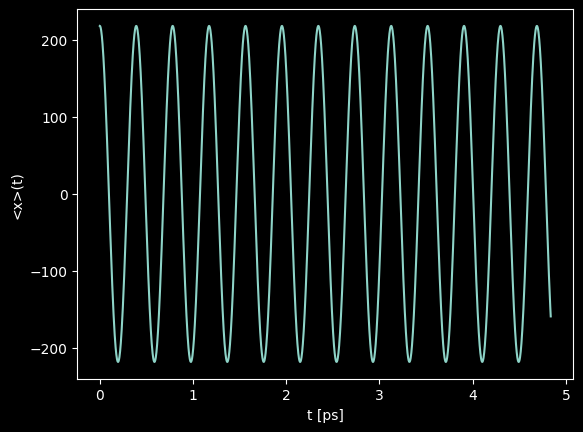

In [25]:



dt = 100.0  # a.u.
Nt = 2000

d0 = C[:, 32] + C[:, 33]
X = Utilis.Xmatrix(N, nlg, wezly, a)
d = d0.copy()
xt = []

for _ in range(Nt):
    xt.append(Utilis.x_expect(d, X))
    d = Utilis.CN_step(d, S, H, dt)

plt.plot(np.arange(Nt)*dt*at2s/1e-12, xt)
plt.xlabel("t [ps]")
plt.ylabel("<x>(t)")
plt.show()

In [34]:
E1 = E[32]
E2 = E[33]
DeltaE = E2 - E1
T = 2 * np.pi / DeltaE  # okres w a.u.

dt = 100.0
Nt =  int(T / dt)
print(Nt,T*at2s/1e-12,DeltaE*at2meV,dt*at2s/1e-12)
dt = 100.0
frame_every = 3

d = d0.copy()
Psi_frames = []

for it in range(Nt):
    # zapisujemy klatkę co frame_every kroków
    if it % frame_every == 0:
        # normalizacja wektora d
        #d_norm = d / np.sqrt(np.conj(d) @ S @ d)
        Psi = Utilis.psi_from_coeffs(d, N, nlg, wezly)
        Psi_frames.append(np.abs(Psi)**2)

    # krok czasowy CN
    d = Utilis.CN_step(d, S, H, dt)



161 0.39040144898939194 10.598341074522368 0.00242


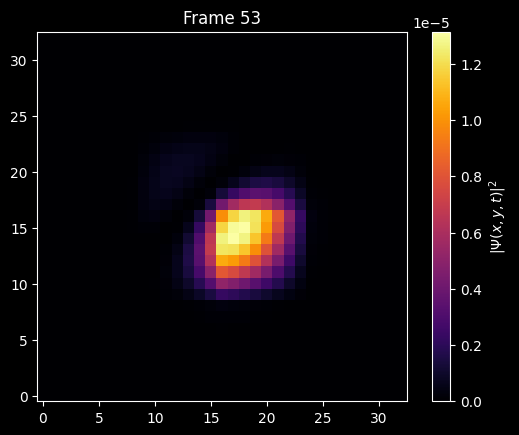

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()

im = ax.imshow(
    Psi_frames[0],
    origin="lower",
    cmap="inferno"
)

cb = plt.colorbar(im, ax=ax)
cb.set_label(r"$|\Psi(x,y,t)|^2$")

def update(frame):
    im.set_array(Psi_frames[frame])
    ax.set_title(f"Frame {frame}")
    return (im,)

ani = FuncAnimation(
    fig,
    update,
    frames=len(Psi_frames),
    interval=75,
    blit=True
)

HTML(ani.to_jshtml())

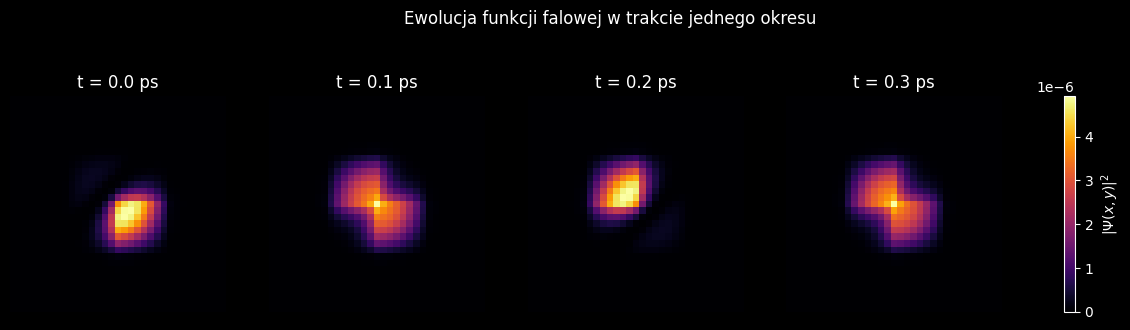

In [28]:
frames = [0, int(Nt/4), int(Nt/2), int(3*Nt/4)]
d = d0.copy()
Psi_frames = []

for it in range(Nt):
    if it in frames:
        d_norm = d / np.sqrt(np.conj(d) @ S @ d)
        Psi = Utilis.psi_from_coeffs(d_norm, N, nlg, wezly)
        Psi_frames.append(np.abs(Psi)**2)
    d = Utilis.CN_step(d, S, H, dt)


fig, axes = plt.subplots(1, 4, figsize=(16,4))

for ax, Psi, t_frame in zip(axes, Psi_frames, frames):
    im = ax.imshow(Psi, origin='lower', cmap='inferno')
    ax.set_title(f"t = {t_frame*dt*at2s/1e-12:.1f} ps")
    ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.7, label=r'$|\Psi(x,y)|^2$')
plt.suptitle("Ewolucja funkcji falowej w trakcie jednego okresu")
plt.show()

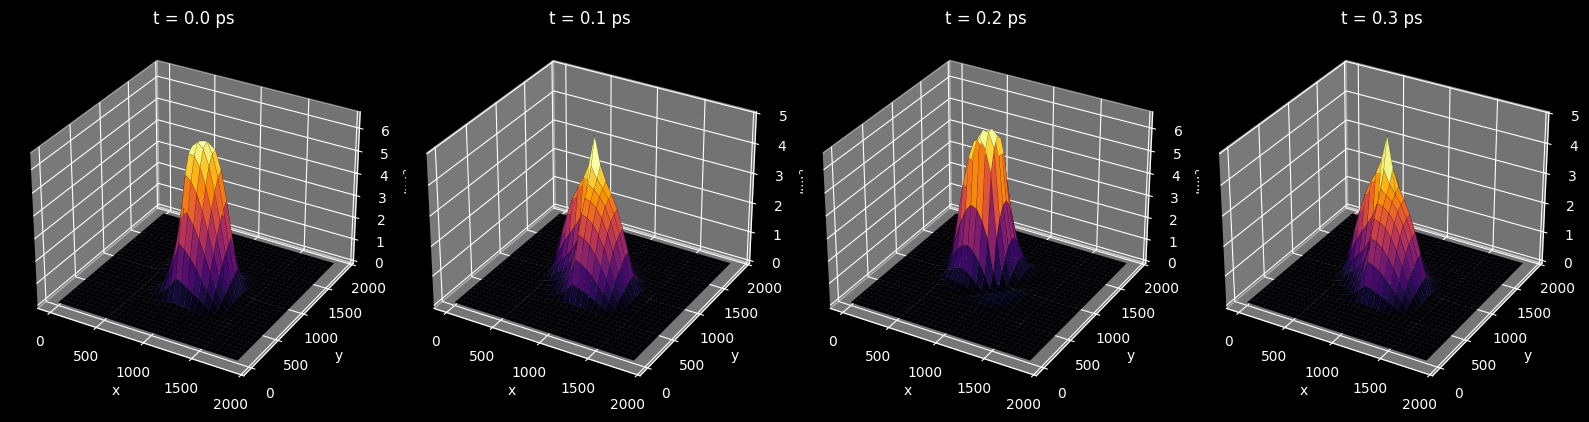

In [29]:
frames = [0, int(Nt/4), int(Nt/2), int(3*Nt/4)]

d = d0.copy()
Psi_frames = []

for it in range(Nt):
    if it in frames:
        d_norm = d / np.sqrt(np.conj(d) @ S @ d)  # normalizacja
        Psi = Utilis.psi_from_coeffs(d_norm, N, nlg, wezly)
        Psi_frames.append(np.abs(Psi)**2)
    d = Utilis.CN_step(d, S, H, dt)

# Siatka x,y
nel = 2 * N
npts = 9
grid_pts = nel * (npts - 1) + 1
x = np.linspace(0, a*nel, grid_pts)
y = np.linspace(0, a*nel, grid_pts)
X, Y = np.meshgrid(x, y)

# Rysowanie 3D
fig = plt.figure(figsize=(16,4))

for i, Psi in enumerate(Psi_frames):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.plot_surface(X, Y, Psi, cmap='inferno', edgecolor='k', linewidth=0.1)
    ax.set_title(f"t = {frames[i]*dt*at2s/1e-12:.1f} ps")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel(r'$|\Psi|^2$')

plt.tight_layout()
plt.show()